# Ultra Diffuse Galaxies Data Analysis

### Imports

In [1]:
%matplotlib widget
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
from IPython.display import clear_output

from cube_cut import cut_cube
from run_barycentric import barycentric_correction
from spectra_stacker_gen2 import spectra_stack
from ppxf_kinematics import ppxf_kinematics

warnings.filterwarnings('ignore')

### step 1: clean spectra

In [2]:
""" User inputs """
s1_file_directory = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/F8D1/GC' # path to directory containing spectra
s1_file_keyword = '*kb*ocubes*' # keyword to find files in directory
x_low = 7 # lowest and highest xvalue of the spaxel to be INCLUDED in the rectangle
x_high = 25
y_low = 17 # lowest and highest yvalue of the spaxel to be INCLUDED in the rectangle
y_high = 80

cut_cube(s1_file_directory, s1_file_keyword, x_low, x_high, y_low, y_high)

[]


ValueError: zero-size array to reduction operation maximum which has no identity

### step 1.5: extract spectra
open qfitsview and create `.fits` file for all objects in the cut files 

### step 2: barycentric correction

In [2]:
""" User inputs """
s2_file_directory = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results_GC/F8D1/GC/obj1/' # path to directory containing spectra
s2_file_keyword = '[0-9]*.fits' # keyword to find files in directory
corrections = 'auto' # 'manual' or else 'automatic'

if corrections == 'manual':
    bary_corr = np.array([0,0,0]) # Manual barycentric correction in km/s. One number for each file!
    # INPUT MANUAL ABOVE ^^^^^^
else:
    bary_corr = barycentric_correction(s2_file_directory, s2_file_keyword)
    bary_corr = np.array(bary_corr)
    if np.all(bary_corr > 0):
        bary_corr = -bary_corr
        print('ensured bary_corr is negative')
    
print(f'Barycentric correction: {bary_corr} km/s')
print(f'Correction Deltas: {np.diff(bary_corr)} km/s')
plt.close()

The Barycentric correction is: 28.093914255118825 km/s
The Barycentric correction is: 28.084414850010386 km/s
The Barycentric correction is: 28.073983910725843 km/s
ensured bary_corr is negative
Barycentric correction: [-28.09391426 -28.08441485 -28.07398391] km/s
Correction Deltas: [0.00949941 0.01043094] km/s


### step 3: spectra stacking
must run for all objects

list of files: ['/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results_GC/F8D1/GC/obj1/74.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results_GC/F8D1/GC/obj1/75.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results_GC/F8D1/GC/obj1/76.fits']
[3583. 3584. 3585. ... 5573. 5574. 5575.]


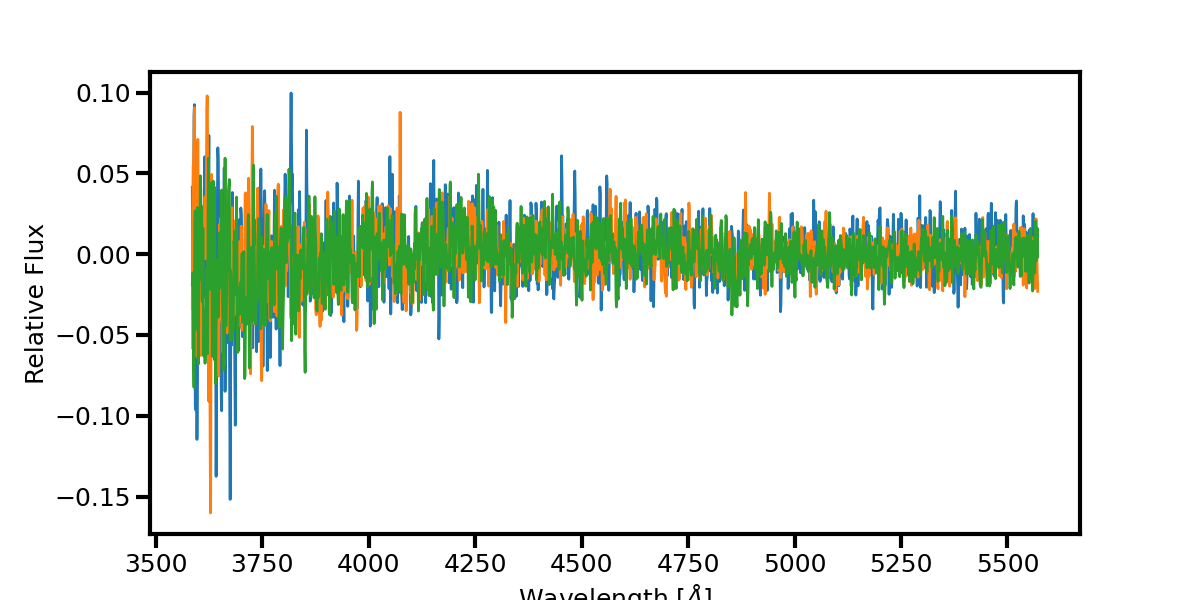

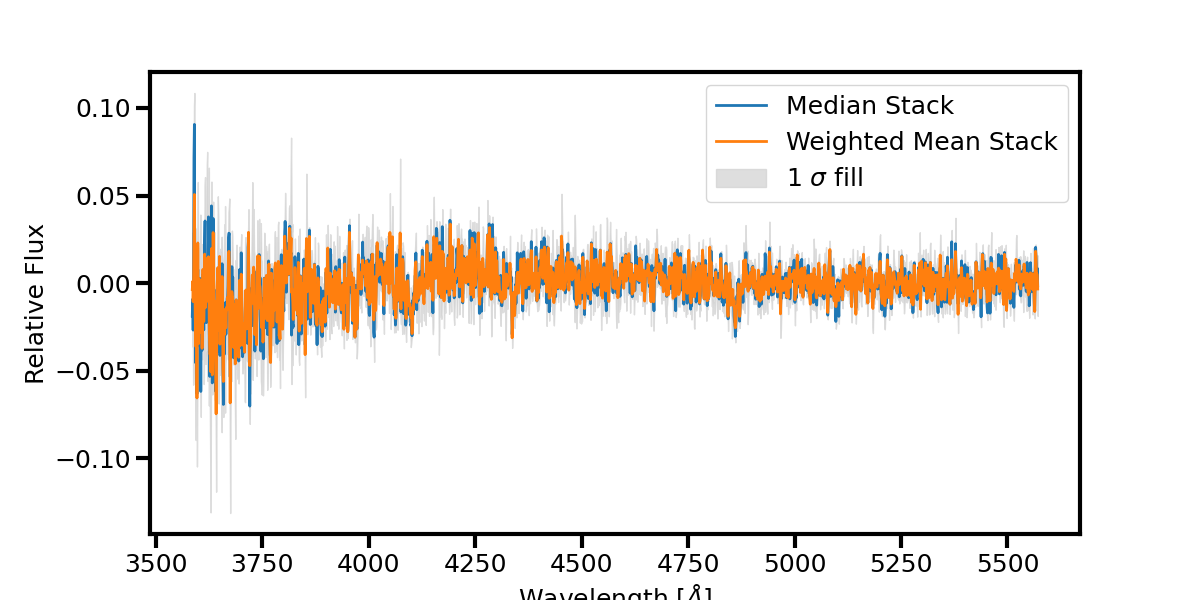

File Written Out
File Written Out
Code Competed Successfully in, 64.25 seconds


In [3]:
""" User inputs """
overwrite = True # if True, will overwrite any existing files. Proceed with caution, probably best to set False

plt.close('all')
spectra_stack(s2_file_directory, s2_file_keyword, bary_corr, overwrite)
# plot 1: spectra
# plot 2: stack
plt.close()

### step 4.1: Check ppxf velocities of degrees

In [14]:
""" User inputs """
ppxf_file = s2_file_directory+'mean_NCS.fits' # path to ppxf input file
fwhm_gal = 4550 / 1800 # instrument resolution
# min_degrees, max_degrees = 1, 30 # min and max degrees for Legendre polynomials
wav_min = 475 # Minimum wavelength to include in the fit. 0 to not cut
wav_max = -1 # Maximum wavelength to include in the fit. -1 to not cut

# degrees = np.arange(min_degrees, max_degrees+1) # make a list of numbers to test for degree
# velocities = []
# for deg in tqdm(degrees):
#     vel, sigma, h3, h4 = ppxf_kinematics(ppxf_file, fwhm_gal, deg)
#     clear_output(wait=True)
#     velocities.append(vel)
# plt.close()

# plt.figure(figsize=(10, 5))
# plt.scatter(degrees, velocities)
# plt.xlabel("Polynomial Degree")
# plt.ylabel("Radial Velocity [km/s]")
# plt.xticks(np.arange(min(degrees), max(degrees)+1, 1.0))
# plt.show()

### step 4.2 ppxf with best degree

 Best Fit:       Vel     sigma
 comp.  0:       -23         1
chi2/DOF: 2032.; DOF: 1494; degree = 4; mdegree = 4
method = capfit; Jac calls: 5; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 2/150
Formal errors:
     dV    dsigma   dh3      dh4
      18 1.5e+03
Elapsed time in pPXF: 0.64 s
Best-fitting redshift z = -0.000076 +/- 0.000060
Signal-to-noise ratio per pixel: 2.95
1.0600324559195782 0.35964884311103407


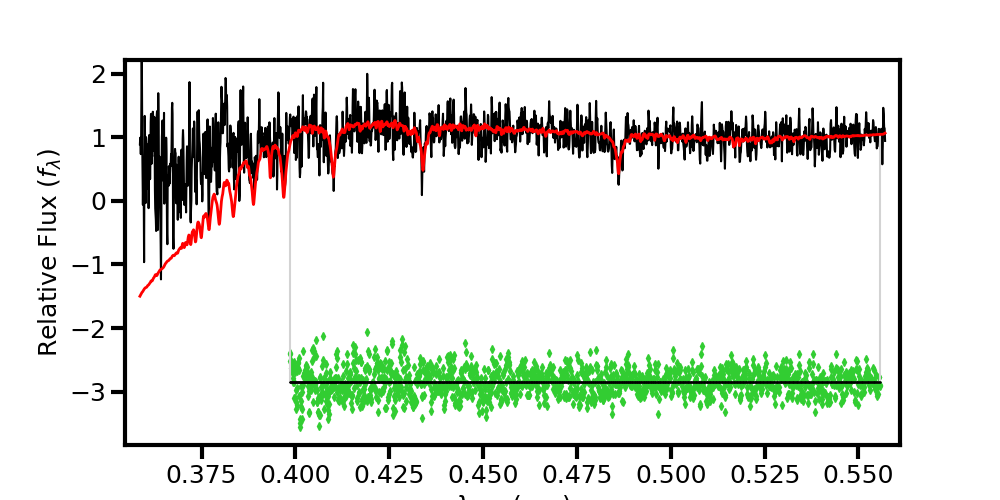

(-22.823719983818574,
 0.6653496345047795,
 -7.612883710761409e-05,
 5.9894688941130984e-05)

In [38]:
""" User inputs """
degree = 4 # degree of Legendre polynomial to use

plt.close()
plt.figure(figsize=(10,5))
ppxf_kinematics(ppxf_file, fwhm_gal, degree, wav_min, wav_max, fit='all', mdegree=4)
# plt.savefig(os.path.dirname(ppxf_file) + '/fit.png')